In [1]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             classification_report, 
                             RocCurveDisplay,
                             roc_curve,
                             r2_score,
                             mean_squared_error,
                             auc, accuracy_score)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.io.arff import loadarff 

## Pre-settings

Carrega base:

In [2]:
df_data = pd.DataFrame(loadarff('dataset_6_letter.arff')[0])
df_data['class'] = df_data['class'].astype(str).str.extract("b'([A-Z])'")

Converte coluna de classificação de categórica para numérica:

In [3]:
df_data['class'] = pd.factorize(df_data['class'])[0]

Separa colunas de features (X) e coluna de classificação (y):

In [4]:
# Features
X = df_data.iloc[:,0:-1]
# Class
y = df_data.iloc[:,-1]

Divide conjunto de treinamento  (80%) e conjunto de teste (20%):

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Configura o stratified K-fold para o cross validation:

In [6]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=199)

## Grid Search

In [7]:
model = SVC()

parameters = {'C':[1, 20],
              'kernel':['linear','rbf','sigmoid'],
              'decision_function_shape':['ovo']
              }

grid = GridSearchCV(estimator = model,             # 
                    param_grid = parameters,       # dicionário com valores para serem testados (Pares Chave-Valor)
                    scoring = 'accuracy',          # métrica de avaliação
                    cv = kf)                        # cross-validation

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Melhor parametro:", grid.best_params_)         
# performance no dataset de teste
print(classification_report(y_test, grid.predict(X_test)))

Melhor parametro: {'C': 20, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       0.97      0.96      0.97       161
           2       0.99      0.99      0.99       160
           3       0.93      0.91      0.92       159
           4       0.96      0.97      0.96       145
           5       0.98      0.95      0.97       152
           6       0.90      0.98      0.94       163
           7       0.99      0.98      0.99       169
           8       0.91      0.97      0.94       171
           9       0.99      0.97      0.98       177
          10       1.00      1.00      1.00       147
          11       0.97      0.89      0.93       168
          12       0.98      0.94      0.96       155
          13       0.98      0.96      0.97       153
          14       0.99      1.00      0.99       162
          15       0.97      0.97      0.97       147
  

## Métricas

### Matriz de confusão

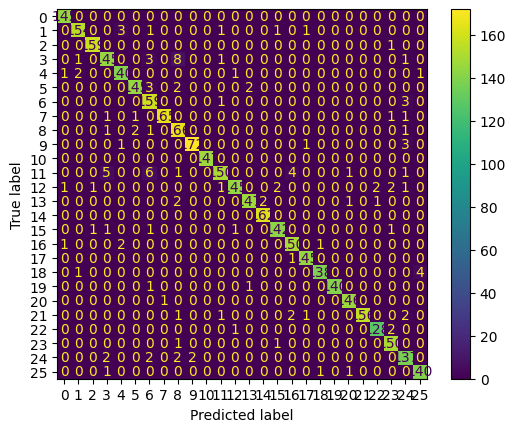

In [8]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=df_data['class'].unique()),display_labels=df_data['class'].unique()).plot()

### ROC

Não aplicável, pois utiliza-se 16 parâmetros.

In [9]:
#fpr, tpr, thresholds = roc_curve(y_test, y_pred)
##Área sob a curva ROC (AUC)
#roc_auc = auc(fpr, tpr)
#disp_roc_curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
#                                 estimator_name=model.__class__.__name__)
#disp_roc_curve.plot()

### Erro médio quadrático

In [10]:
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 3.15675


### R2 Score

In [11]:
print("R2_score:", r2_score(y_test, y_pred))

R2_score: 0.9426961355234988


### Accuracy Score

In [12]:
print("Accuracy score:", accuracy_score(y_test,y_pred))

Accuracy score: 0.96825
